In [76]:
import pathlib

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from transforms import transforms

IMG_DIR = pathlib.Path("images/")

### Blurring, Edge, Sharpening

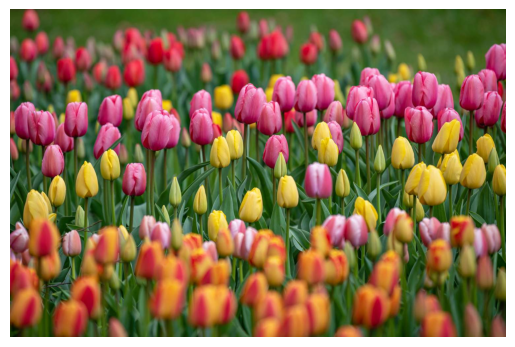

In [77]:
img = cv2.imread(str(IMG_DIR / "tulips.jpg"))
plt.imshow(img[..., ::-1])
plt.axis("off")
plt.show()

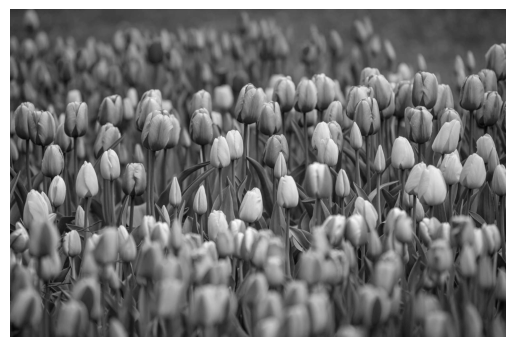

In [78]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.axis("off")
plt.show()

### Blurring

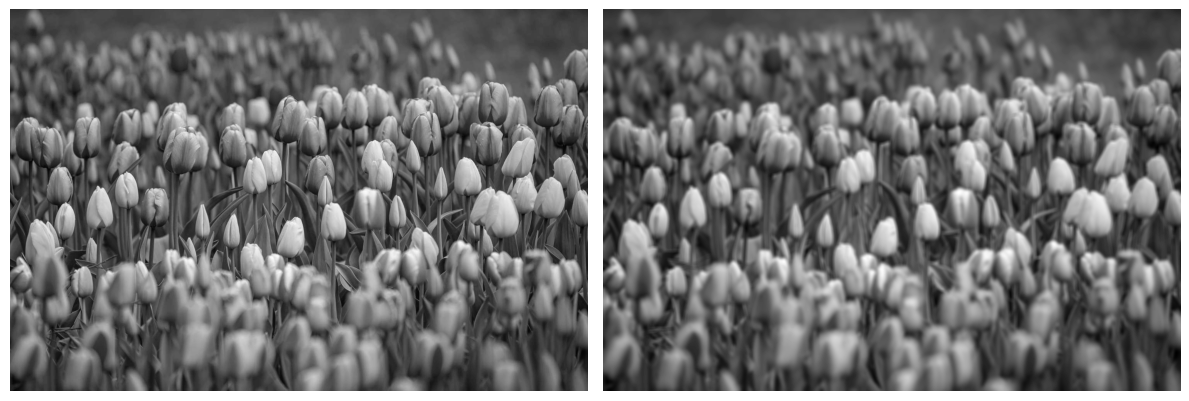

In [79]:
blurring_mask = np.ones((10, 10)) / 100
img_blurred = signal.convolve2d(img_gray, blurring_mask, boundary="symm", mode="same")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
ax1.imshow(img_gray, cmap="gray")
ax1.axis("off")
ax2.imshow(img_blurred, cmap="gray")
ax2.axis("off")
plt.show()

### Edge

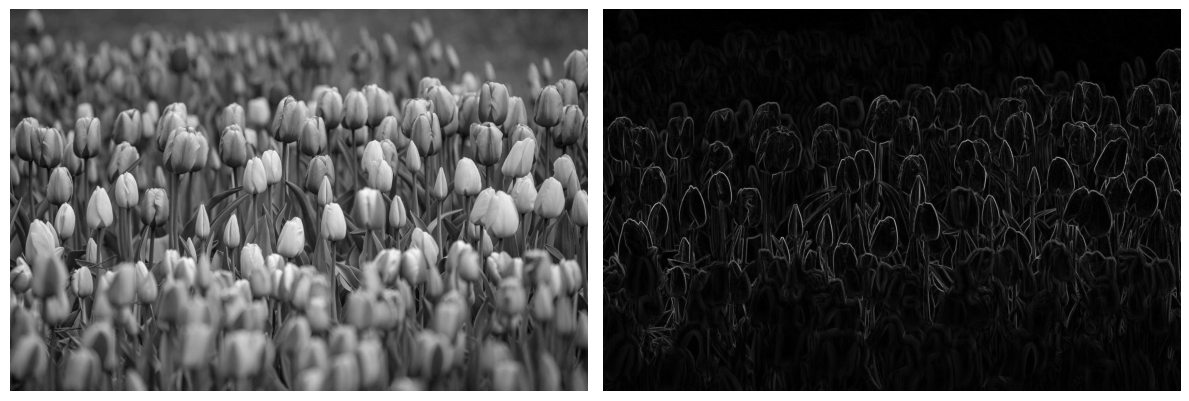

In [80]:
xmask = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
ymask = xmask.transpose()

fx = signal.convolve2d(img_gray, xmask, boundary="symm", mode="same")
fy = signal.convolve2d(img_gray, ymask, boundary="symm", mode="same")
gradient_magnitude = np.sqrt(fx**2 + fy**2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
ax1.imshow(img_gray, cmap="gray")
ax1.axis("off")
ax2.imshow(gradient_magnitude, cmap="gray")
ax2.axis("off")
plt.show()

In [81]:
gradient_magnitude.max(), gradient_magnitude.std()

(553.5955202130884, 36.94856667040818)

In [82]:
threshold = gradient_magnitude.max() - 14 * gradient_magnitude.std()
threshold

36.31558682737398

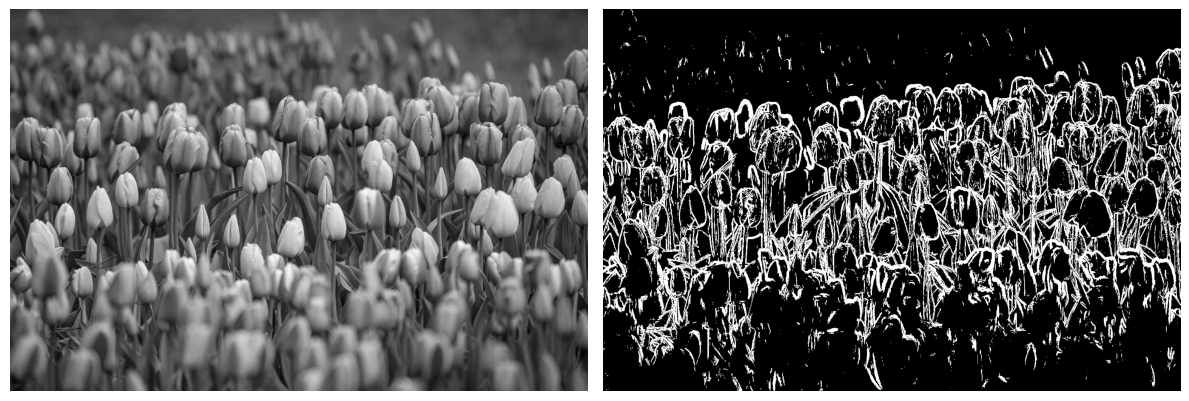

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
ax1.imshow(img_gray, cmap="gray")
ax1.axis("off")
ax2.imshow(gradient_magnitude > threshold, cmap="gray")
ax2.axis("off")
plt.show()

### Sharpening

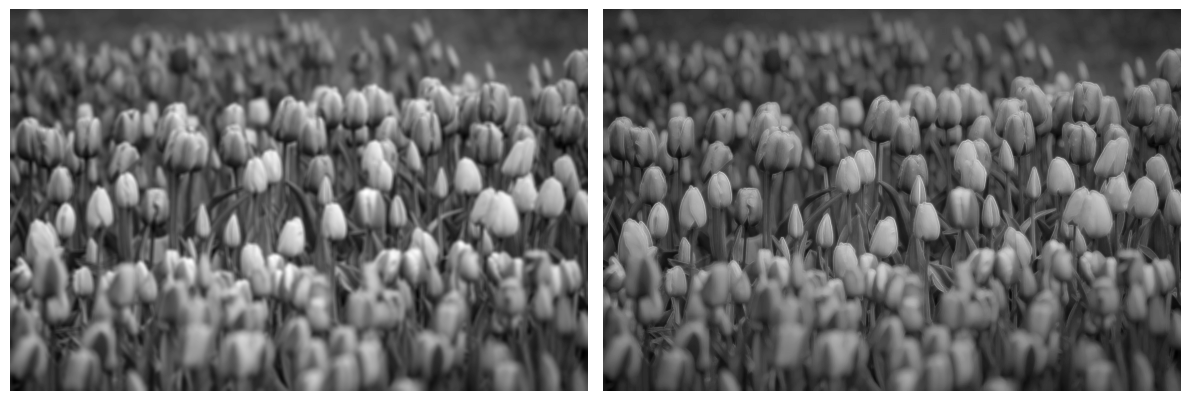

In [84]:
img_sharped = img_blurred + 0.25 * gradient_magnitude

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
ax1.imshow(img_blurred, cmap="gray")
ax1.axis("off")
ax2.imshow(img_sharped, cmap="gray")
ax2.axis("off")
plt.show()